In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


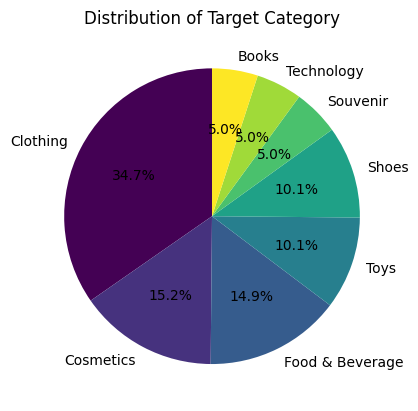

In [13]:
if 'category' in df.columns:
    df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
    plt.title("Distribution of Target Category")
    plt.ylabel("")
    plt.show()

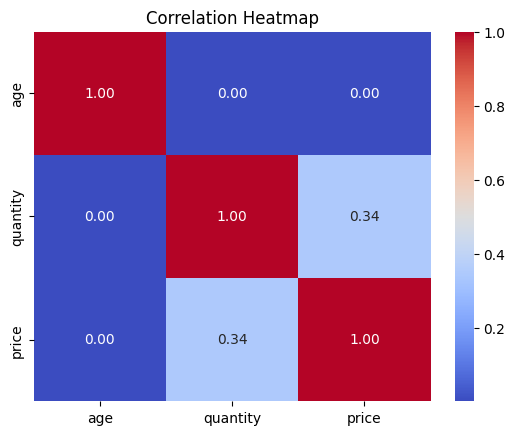

In [16]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [4]:
df.dropna(inplace=True)

In [5]:
df_sample = df.sample(n=1000, random_state=42)

In [6]:
df_sample = pd.get_dummies(df_sample, drop_first=True)

In [9]:
X = df_sample.drop('quantity', axis=1, errors='ignore')  # Replace with your actual target column
y = df_sample['quantity']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           1       0.81      0.85      0.83        41
           2       0.70      0.76      0.73        37
           3       0.92      0.51      0.66        43
           4       0.58      0.86      0.69        44
           5       0.78      0.60      0.68        35

    accuracy                           0.72       200
   macro avg       0.76      0.72      0.72       200
weighted avg       0.76      0.72      0.72       200



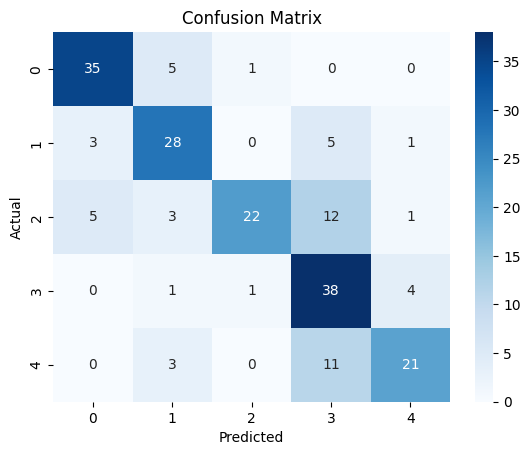

In [19]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()